In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
DataFrameCleaned = pd.read_csv('N:\AI_ML_RL\APT_dataset\dataset_\datacleaning\cleanedPCA.csv',sep=',')
print(DataFrameCleaned.shape)


(77963, 32)


In [8]:

from keras.regularizers import l2
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# Assuming 'X' contains your input features and 'y' contains your labels
# X should be a numpy array of shape (num_samples, num_features)
# y should be a numpy array of shape (num_samples,)
# Step 1: Split the dataset into features (X) and labels (y)
X = DataFrameCleaned.drop(columns=['Stage','Activity'])  # Assuming 'Stage' is the target column
y = DataFrameCleaned['Stage']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define a Dense neural network model
model = MLPClassifier(hidden_layer_sizes=(64, 16), activation='relu', solver='adam', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)





Accuracy: 1.00
              precision    recall  f1-score   support

       Stage       1.00      1.00      1.00     11023

   micro avg       1.00      1.00      1.00     15592
   macro avg       0.80      0.80      0.80     15592
weighted avg       1.00      1.00      1.00     15592



c:\Users\NasrJB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2126: UserWarning: labels size, 5, does not match size of target_names, 1
  warnings.warn(
c:\Users\NasrJB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NasrJB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NasrJB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. U

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Stage'],labels=[0, 1, 2, 3, 4], zero_division=1)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(report)


Accuracy: 1.00
              precision    recall  f1-score   support

       Stage       1.00      1.00      1.00     11023

   micro avg       1.00      1.00      1.00     15592
   macro avg       1.00      1.00      1.00     15592
weighted avg       1.00      1.00      1.00     15592



c:\Users\NasrJB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2126: UserWarning: labels size, 5, does not match size of target_names, 1
  warnings.warn(


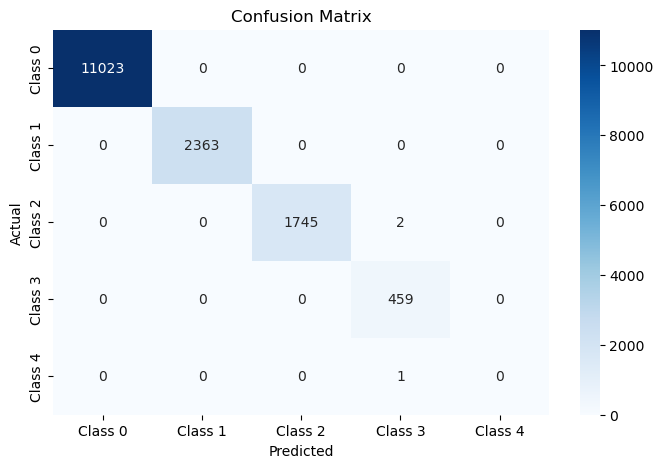

Confusion Matrix:
[[11023     0     0     0     0]
 [    0  2363     0     0     0]
 [    0     0  1745     2     0]
 [    0     0     0   459     0]
 [    0     0     0     1     0]]


In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
                 

# Visualize confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix,
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['Class 0', 'Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0', 'Class 1','Class 2','Class 3','Class 4']
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Assuming y_test and y_pred contain your true labels and predicted labels, respectively
print("Confusion Matrix:")
print(conf_matrix)

5


c:\Users\NasrJB\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


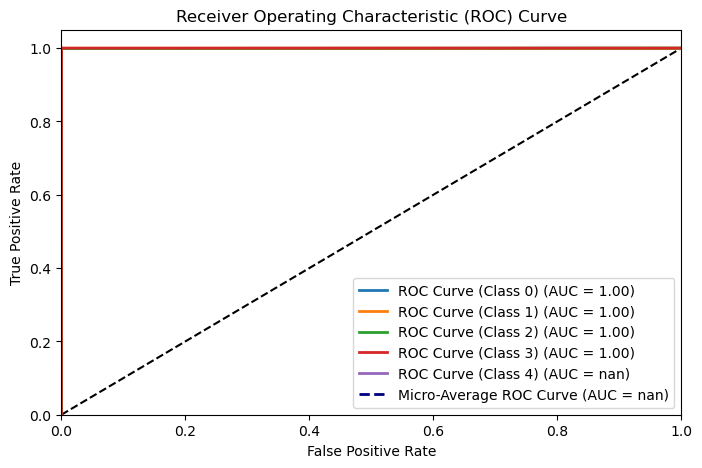

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred contain your true labels and predicted labels, respectively
n_classes = len(np.unique(y_test))  # Number of classes
print(n_classes)
# Initialize empty arrays for storing false positive rates and true positive rates
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), (y_pred == i).astype(int))
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

roc_auc["micro"] = auc(all_fpr, mean_tpr)

# Plot the ROC curve for each class and the micro-average ROC curve
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC Curve (Class {i}) (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(all_fpr, mean_tpr, color='navy', lw=2, linestyle='--', label='Micro-Average ROC Curve (AUC = {:.2f})'.format(roc_auc["micro"]))

plt.legend(loc='lower right')
plt.show()


In [37]:

# Perform cross-validation (e.g., 5-fold cross-validation)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.98961072 0.98467261 0.99974347 0.99993586 0.99929451]
Mean Accuracy: 0.9946514362903167


In [44]:
import joblib

# Define a file path where you want to save the model
model_filename = 'mlp_model_APT.pkl'

# Save the model to the file
joblib.dump(model, model_filename)

print(f"Model saved as '{model_filename}'")

Model saved as 'mlp_model_APT.pkl'
